In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 
import math
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: No module named 'pydot'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0464F250>,
      dtype=object)

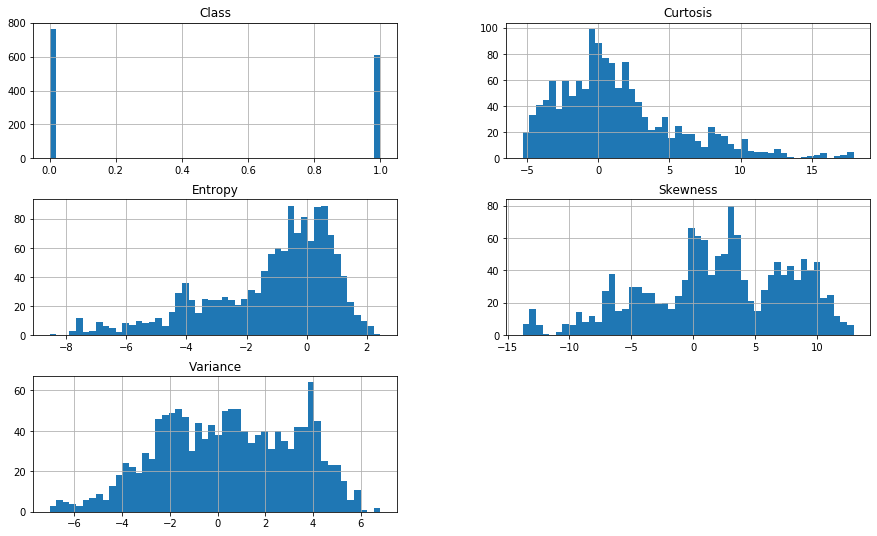

In [2]:
w = pd.read_csv(r'C:\Users\MHI6\Guido\Datasets\bill_authentication.csv') 
w.hist(figsize=(15,9),bins=50)

In [3]:
w.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
X = w.iloc[:, :4].values
y = w.iloc[:, 4].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [6]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.970873786407767

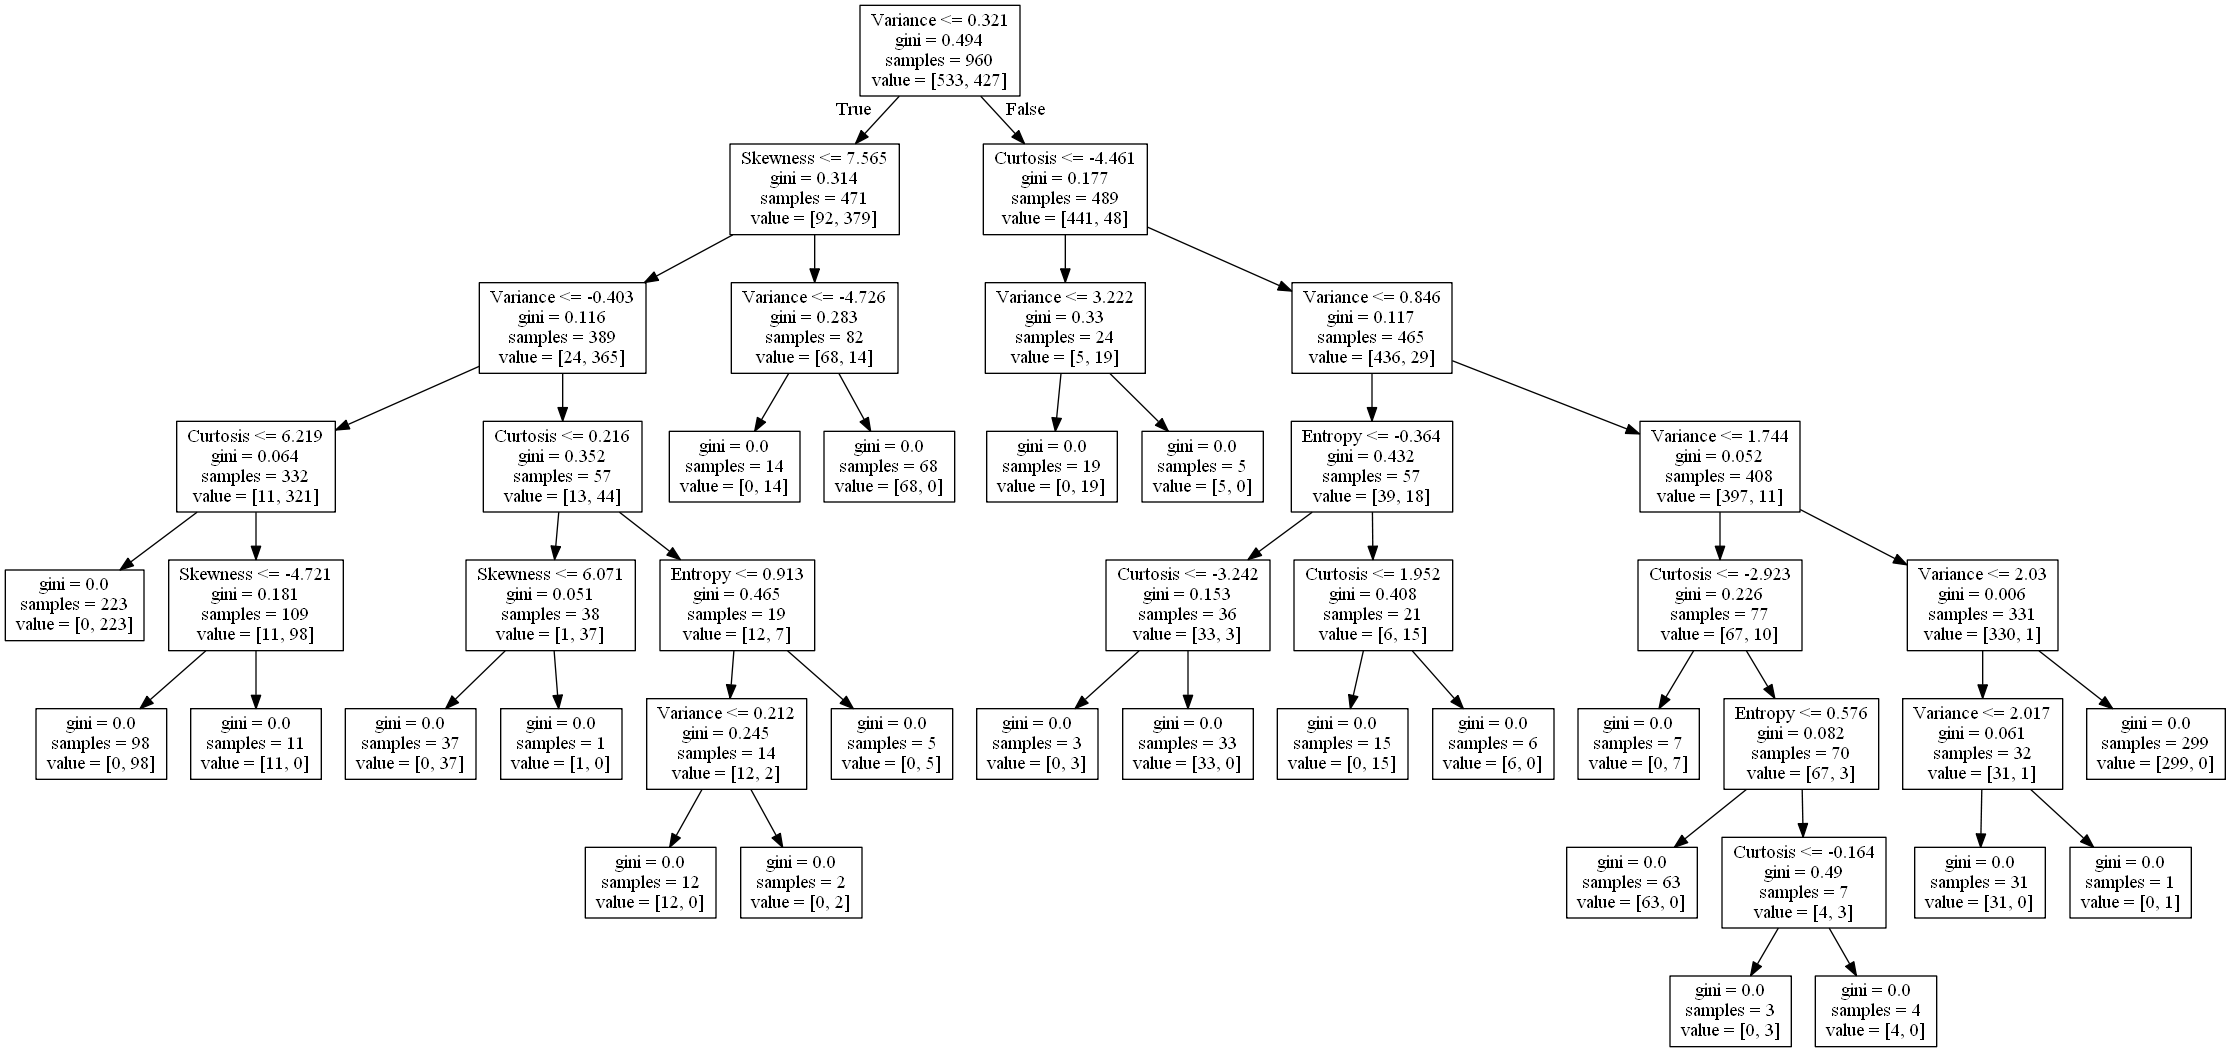

In [8]:
dot_bill = StringIO()
tree.export_graphviz(dtc, out_file = dot_bill, feature_names = w.columns.values[:4])
(graph,) = pydot.graph_from_dot_data(dot_bill.getvalue())
Image(graph.create_png())

In [9]:
dtc2 = DecisionTreeClassifier(criterion='entropy')
dtc2.fit(X_train, y_train)
y_pred = dtc2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9927184466019418

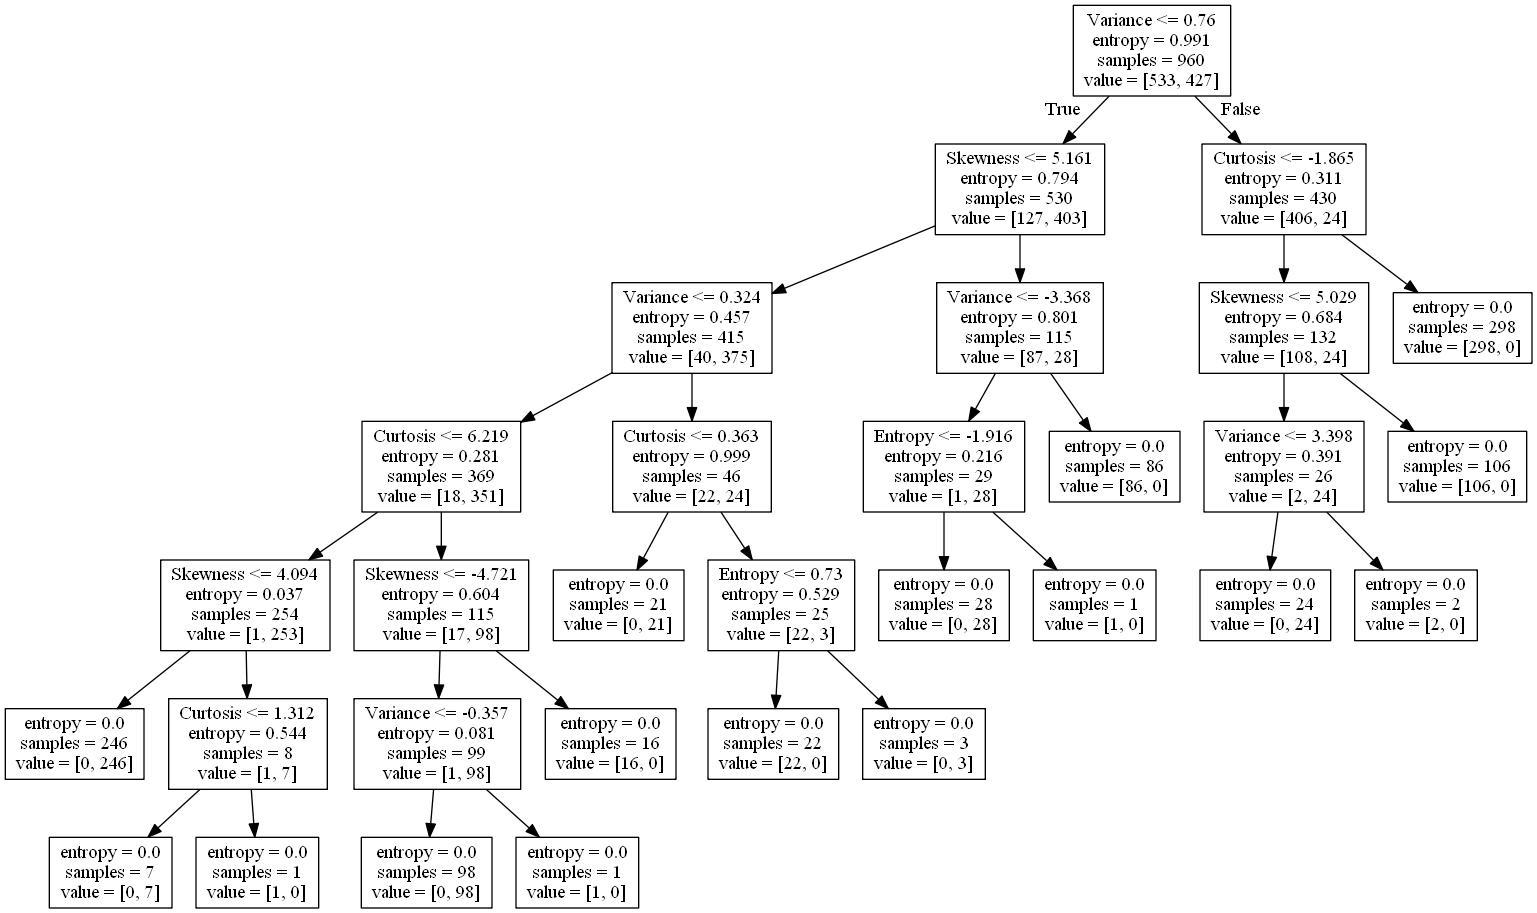

In [10]:
dot_bill = StringIO()
tree.export_graphviz(dtc2, out_file = dot_bill, feature_names = w.columns.values[:4])
(graph,) = pydot.graph_from_dot_data(dot_bill.getvalue())
Image(graph.create_png())

In [11]:
#Improving the performance of decision tree with a function
dtc3 = DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'], 'max_depth':[3,5,7,20]}
gs_inst = GridSearchCV(dtc3, param_grid=param_grid, cv=5)
gs_inst.fit(X_train, y_train) # we vary the split scoring criterion between gini and entropy and vary the max_depth of a tree.

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20]},
             pre_dispat

In [12]:
y_pred_gs = gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs) #IMPROVED!!

0.9927184466019418

In [15]:
gs_inst.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

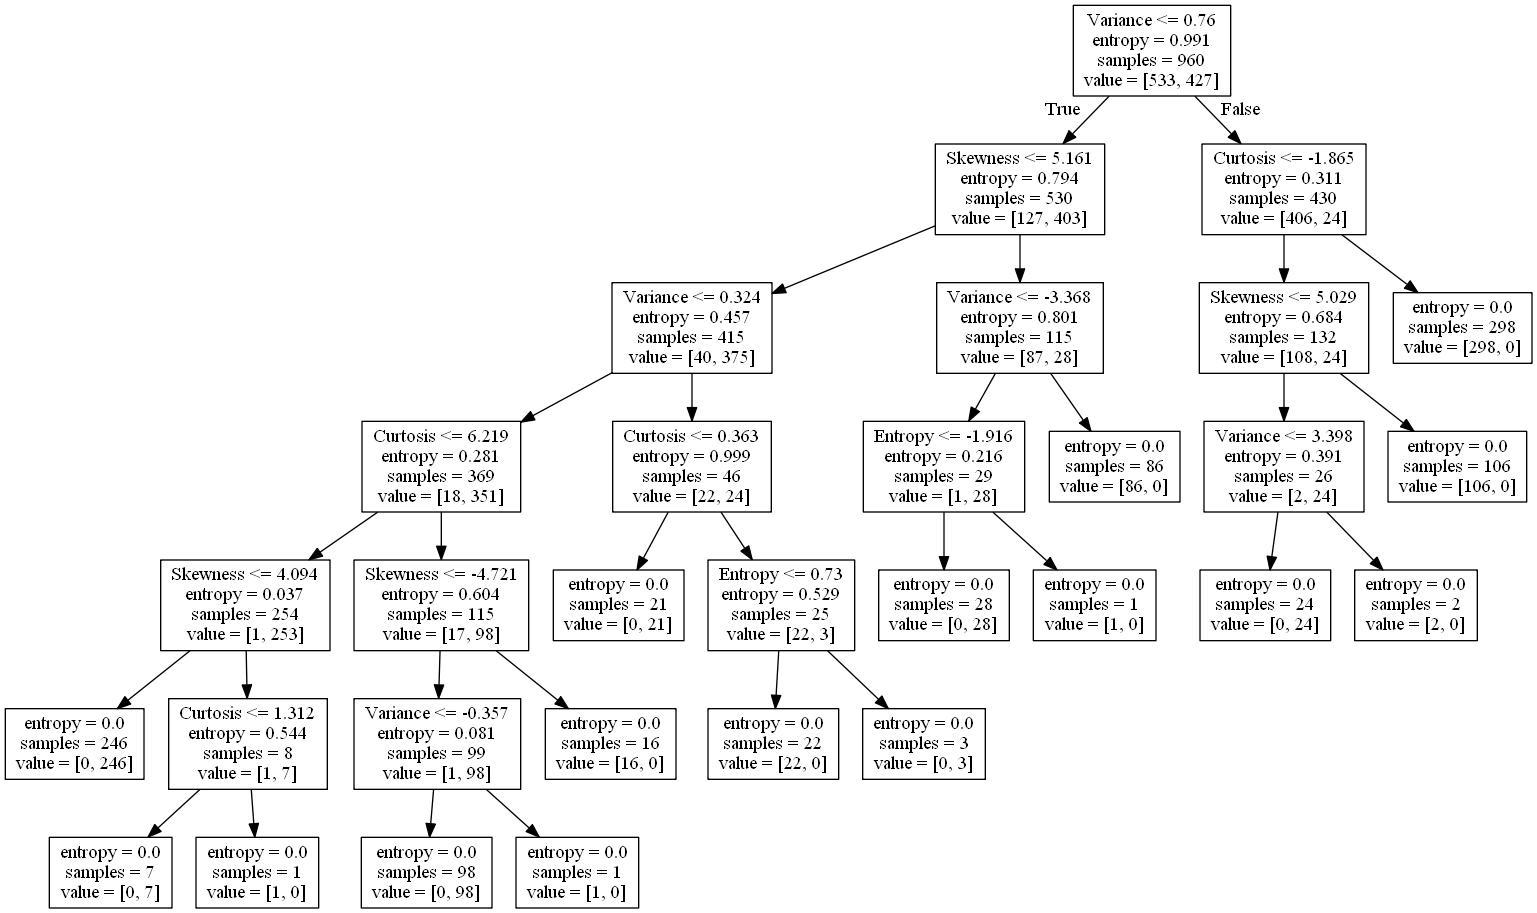

In [13]:
dot_bill = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_bill, feature_names = w.columns.values[:4])
(graph,) = pydot.graph_from_dot_data(dot_bill.getvalue())
Image(graph.create_png())

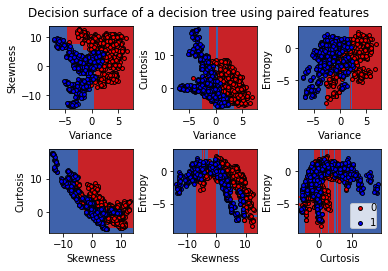

<Figure size 432x288 with 0 Axes>

In [14]:
#DECISION BOUNDARIES FOR TREE

n_classes = 2
plot_colors = "rb"
plot_step = 0.02
target = np.arange(2)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    
    # We only take the two corresponding features
    X2 = w.iloc[:, pair].values
    y2 = w.iloc[:, 4].values

    # Train
    tree = DecisionTreeClassifier().fit(X2, y2)

    
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
    y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)) 
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(w.columns.values[pair[0]])
    plt.ylabel(w.columns.values[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X2[idx, 0], X2[idx, 1], c=color, label=target[i],cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
plt.show()